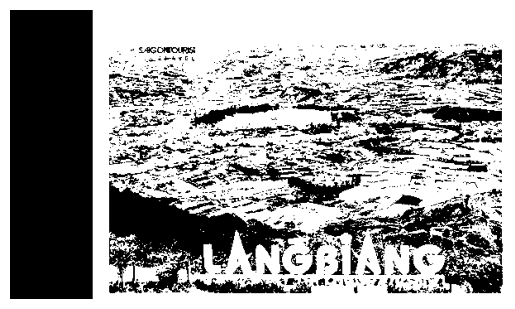

In [7]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

img = Image.open('exercise/dalat.jpg').convert('RGB')
x, y, w, h = 0, 0, 500, 350
langbiang = img.crop((x, y, x + w, y + h))

# Tịnh tiến sang phải 100px
translated = Image.new('RGB', (w + 100, h))
translated.paste(langbiang, (100, 0))


gray = translated.convert('L')

a = np.asarray(gray)
thres = threshold_otsu(a)
b = a > thres
result = Image.fromarray((b * 255).astype(np.uint8))

# Lưu kết quả
result.save('output/lang_biang.jpg')

# Hiển thị
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

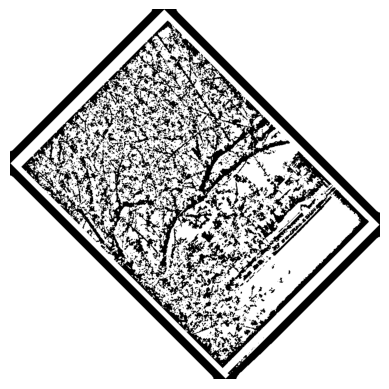

In [9]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local


img = Image.open('exercise/dalat.jpg').convert('RGB')


x, y, w, h = 500, 0, 500, 700
hxh = img.crop((x, y, x + w, y + h))

# Xoay 45 độ
rotated = hxh.rotate(45, expand=True)


gray = rotated.convert('L')
a = np.asarray(gray)
b = threshold_local(a, block_size=61, offset=10)

binary_adaptive = a > b
result = Image.fromarray((binary_adaptive * 255).astype(np.uint8))

# Lưu
result.save('output/ho_xuan_huong.jpg')

# Hiển thị
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

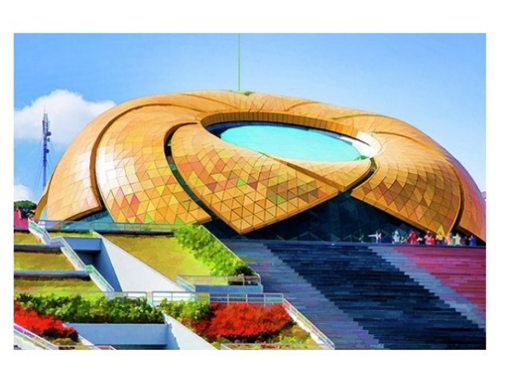

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from skimage.morphology import binary_closing, disk


img = Image.open('exercise/dalat.jpg').convert('RGB')


x, y, w, h = 1000, 0, 500, 350
hxh = img.crop((x, y, x + w, y + h))
hxh_np = np.array(hxh)

#Coordinate Mapping
H, W = hxh_np.shape[:2]
X, Y = np.meshgrid(np.arange(W), np.arange(H))
amplitude = 15
frequency = 0.03

X_new = X + amplitude * np.sin(2 * np.pi * Y * frequency)
Y_new = Y

X_new = np.clip(X_new, 0, W - 1)
Y_new = np.clip(Y_new, 0, H - 1)

warped_img = np.zeros_like(hxh_np)
for i in range(3):  # xử lý từng kênh RGB
    warped_img[..., i] = nd.map_coordinates(hxh_np[..., i], [Y_new, X_new], order=1, mode='reflect')

gray = np.array(Image.fromarray(warped_img).convert('L'))
thresh = threshold_local(gray, block_size=35, offset=10)
binary = gray > thresh

#Binary Closing
closed = binary_closing(binary, footprint=disk(3))

# Lưu
closed.save('output/quang_truong_lam_vien.jpg')

# Hiển thị
plt.imshow(closed, cmap='gray')
plt.axis('off')
plt.show()